In [19]:
import pandas as pd
import numpy as np

# Dataset

In [20]:
data = pd.read_csv('/Users/thuyduc/GG Advanced Data Analytics/Course 5/Module 4/Hypothesis testing with Python/marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = data[['Radio', 'Social Media', 'Sales']]
df = df.dropna()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=['Radio', 'Social Media', 'Sales'])
df.head()

,Radio,Social Media,Sales
0,-1.808070,-0.898526,-1.146910
1,-0.380950,-1.352277,0.321089
2,-0.856177,-1.449071,-1.006175
3,0.816280,1.744041,1.488272
4,1.897891,1.993542,1.749018


In [13]:
data.isnull().sum()
data = data.dropna()
data.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [47]:
x = df[['Radio', 'Social Media']]
y = df['Sales']

# Code chay

In [37]:
w = np.array([1, 2])
x = np.array([-1.808070, -0.898526])
b = 0.1

In [38]:
def linear_function(w, x, b):
    """Calculate y_hat using a linear function."""
    t = np.dot(w, x)
    y_hat = t + b
    return y_hat

y_hat = linear_function(w, x, b)
y_hat

-3.505122

In [39]:
def loss_function(y, y_hat):
    """Calculate loss function."""
    loss = (y - y_hat)**2
    return loss


y = 90.054222
loss = loss_function(y, y_hat)
loss 

8753.350849710336

In [40]:
def gradient_descent(y, y_hat, x, w, b, alpha, dLdw, dLdb):
    """Find w, b using gradient descent"""
    
    w = w - alpha*dLdw
    b = b - alpha*dLdb
    #print(dLdw)
    return w, b

alpha = 0.01
dLdw = 3
dLdb = 4
w, b = gradient_descent(y, y_hat, x, w, b, alpha, dLdw, dLdb)
w, b

(array([0.97, 1.97]), 0.060000000000000005)

### SGD

Epoch: 1
Iteration 1: w = [1.99921717 2.99961097], b = 3.0004329616934946, loss = 4.68639570084001
Iteration 2: w = [1.99905424 2.99903259], b = 3.0008606739892794, loss = 4.573445199138061
Iteration 3: w = [1.99870315 2.99843837], b = 3.0012707382106463, loss = 4.203816641132632
Iteration 4: w = [1.99733606 2.99551749], b = 2.9995959582147353, loss = 70.12220086758826
Iteration 5: w = [1.99315577 2.99112652], b = 2.997393359475891, loss = 121.28603010894467
Iteration 6: w = [1.99218797 2.98977262], b = 2.9960528795740538, loss = 44.92215918075105
Iteration 7: w = [1.98827565 2.98642174], b = 2.994034307499202, loss = 101.86583053427947
Iteration 8: w = [1.98848031 2.98650047], b = 2.9936715099091384, loss = 3.29055228390031
Iteration 9: w = [1.98774914 2.98676781], b = 2.9930263723923862, loss = 10.405060388033547
Iteration 10: w = [1.9868932  2.98598221], b = 2.993581262888844, loss = 7.697586576480545
Iteration 11: w = [1.98744139 2.98583384], b = 2.993252135367925, loss = 2.7081231

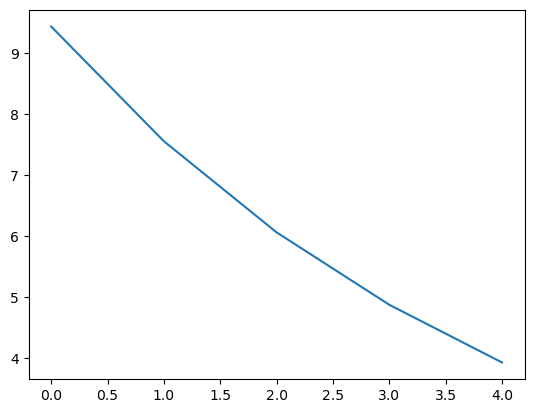

In [54]:
# initialize w, b, epochs, alpha
w = np.array([2, 3])
b = 3
epochs = 5
alpha = 0.0001
losses = []
for i in range(epochs):
    print(f'Epoch: {i+1}')
    for item in range(len(df)):
        # 1. Pick samples
        x = np.array([df['Radio'][item], df['Social Media'][item]])
        y = df['Sales'][item]
        
        # 2. Calculate y_hat
        y_hat = linear_function(w, x, b)

        # 3. Calculate loss
        loss = loss_function(y, y_hat)

        # 4. Calculate gradients/derivatives
        dLdw = 2*(y_hat - y)*x
        dLdb = 2*(y_hat - y)

        # 5. Update weights
        w, b = gradient_descent(y, y_hat, x, w, b, alpha, dLdw, dLdb)
        
        print(f'Iteration {item+1}: w = {w}, b = {b}, loss = {loss}')

    losses.append(loss)


plt.plot(losses)

**Mini-batch**

In [14]:
x = data[['Radio', 'Social Media']]
y = data['Sales']

In [ ]:
scaler = StandardScaler()

In [45]:
df.shape
570/4

142.5

Epoch: 1
Iteration 0: w = [4.99803962 6.99778674], b = 4.001819540644048, loss = 83.85403593719326
Iteration 3: w = [4.99309622 6.99124952], b = 3.9979255591382836, loss = 402.37586345297194
Iteration 6: w = [4.98961086 6.98881163], b = 3.995940029900287, loss = 196.8480702855425
Iteration 9: w = [4.98801295 6.98762515], b = 3.9970125245680985, loss = 52.660954254894
Iteration 12: w = [4.98576137 6.98374414], b = 3.994604913801984, loss = 229.34824159570942
Iteration 15: w = [4.98101463 6.97391435], b = 3.9925650628450486, loss = 484.40927414286034
Iteration 18: w = [4.97956587 6.97182726], b = 3.9907080911668165, loss = 137.74227376273873
Iteration 21: w = [4.97940574 6.97122795], b = 3.9899809419614387, loss = 38.25207746738342
Iteration 24: w = [4.97749021 6.96974611], b = 3.988649595097605, loss = 121.01038712524057
Iteration 27: w = [4.97641247 6.96976046], b = 3.987266016576668, loss = 49.19413306108512
Iteration 30: w = [4.9765151  6.96933052], b = 3.9865957357528985, loss = 26.

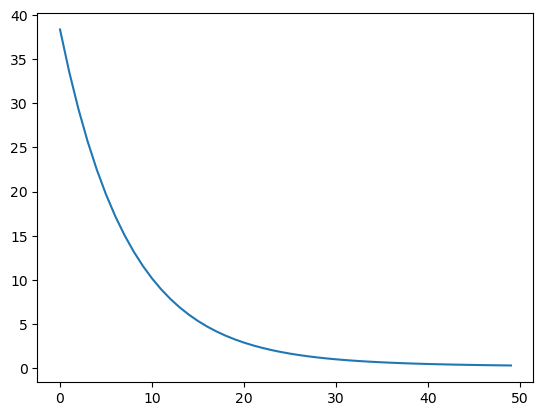

In [57]:
#  initialize w, b, epochs, alpha
mini_batch = 3
w = np.array([5, 7])
b = 4
epochs = 50
alpha = 0.0001
losses = []

for epoch in range(epochs):
    print(f'Epoch: {epoch+1}')

    for batch in np.arange(0, len(df), mini_batch):
        # 1. Pick samples (batch)
        x = np.array([df['Radio'][batch:batch+mini_batch], df['Social Media'][batch:batch+mini_batch]]).T
        y = df['Sales'][batch:batch+mini_batch].values

        cost = 0
        dLdw = 0
        dLdb = 0
        for i in range(mini_batch):
            # 2. Calculate y_hat
            y_hat_i = linear_function(w, x[i], b)

            # 3. Calculate loss
            cost += loss_function(y[i], y_hat_i)

            # 4. Calculate gradients/derivatives
            dLdw += 2*( y_hat_i - y[i] )*x[i]
            dLdb += 2*(y_hat_i - y[i] )
        
        loss = cost/mini_batch
        dLdb = dLdb/mini_batch
        dLdw = dLdw/mini_batch
        
        # 5. Update w, b
        w, b = gradient_descent(y, y_hat, x, w, b, alpha, dLdw, dLdb)
        
        print(f'Iteration {batch}: w = {w}, b = {b}, loss = {loss}')
    
    losses.append(loss)

plt.plot(losses)


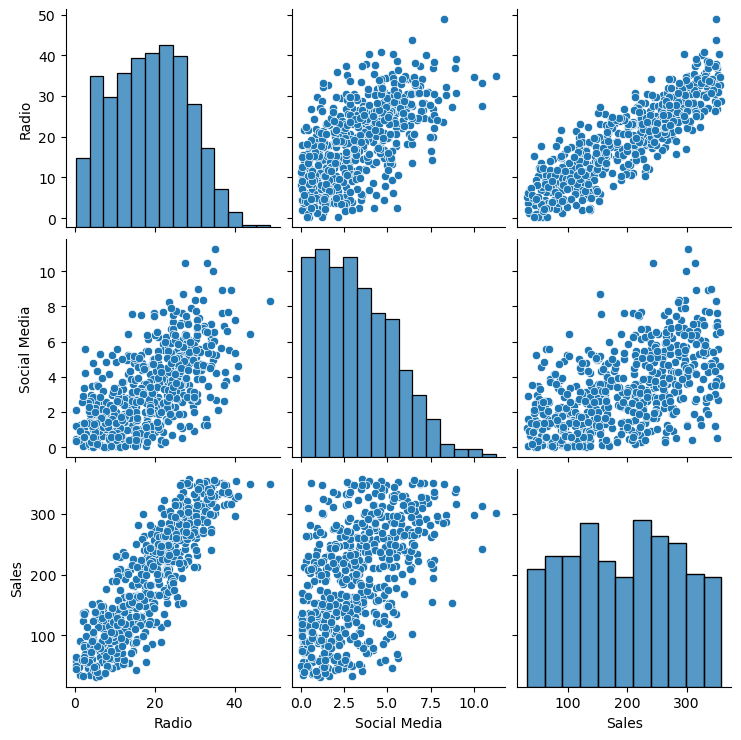

In [58]:
import seaborn as sns
sns.pairplot(data)